In [1]:
import pandas as pd

In [91]:
import matplotlib.pyplot as plt
import pylab
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
# Window 의 한글 폰트 설정
# plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
plt.rc('font', family='AppleGothic') 
plt.rc('axes', unicode_minus=False)

set_matplotlib_formats('retina')
# plot 한글출력
plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
# audits= pd.read_csv('./../audits.csv')
# boxoffice= pd.read_csv('boxoffice.csv')
# companys= pd.read_csv('companys.csv')
# show_time= pd.read_csv('show_time.csv')

In [3]:
# director에는 세개 파일이 있다. 전처리 후 merge가 필요하다.
director_detail= pd.read_csv('./../01.Data_Collection/director_detail.csv')
director_code= pd.read_csv('./../01.Data_Collection/director_code.csv')
directors= pd.read_csv('./../01.Data_Collection/directors.csv')

전체적으로 확인

In [27]:
# 각자 길이 확인
print(len(director_detail))
print(len(directors))
print(len(director_code))

13084
889
889


In [38]:
director_detail.sample()

,movieCd,movieNm,moviePartNm,peopleCd,peopleNm,sex
4952,20158821,삼례,시나리오(각본),20168120,이현정,여자


In [7]:
director_code.sample()

,filmoNames,movieNm,peopleCd,peopleNm,repRoleNm
432,우리마을|근본주의자|고봉수 감독 단편선|갈까부다|다영씨|튼튼이의 모험|델타 보이즈|...,델타 보이즈,20210668,고봉수,감독


In [35]:
directors.sample()

,movieCd,movieNm,peopleNm,repRoleNm
285,20148384,그림자들의 섬,김정근,감독


- directors 와 director_detail 은 movieCd 기준으로 합칠수 있음. detail 을 메인으로, directors 의 repRoleNm 만 추가하면 됨
- director_code 는 중복되는 movieNm 있는지 확인 후 merge 가능

null 값 확인

In [28]:
print('detail',director_detail.isnull().sum())
print('code',director_code.isnull().sum())
print('directors',directors.isnull().sum())
#detail 의 sex만 비어있음

detail movieCd         0
movieNm         0
moviePartNm     0
peopleCd        0
peopleNm        0
sex            62
dtype: int64
code filmoNames    0
movieNm       0
peopleCd      0
peopleNm      0
repRoleNm     0
dtype: int64
directors movieCd      0
movieNm      0
peopleNm     0
repRoleNm    0
dtype: int64


### 디렉터 디테일 null 값 채우기

In [23]:
# 해당 people 의 기록에 전혀 성별이 있지 않은지 확인
director_detail[director_detail['peopleCd']==20200534]

,movieCd,movieNm,moviePartNm,peopleCd,peopleNm,sex
3383,20179230,도어락,VFX 아티스트,20200534,조성희,NaN
3384,20156554,물괴,VFX 아티스트,20200534,조성희,NaN
3385,20142406,탐정 홍길동: 사라진 마을,VFX 아티스트,20200534,조성희,NaN
3386,20132799,족구왕,VFX 아티스트,20200534,조성희,NaN


In [28]:
# 채울 감독 위치 지정
director_detail[director_detail['sex'].isnull()].iloc[40:60]

,movieCd,movieNm,moviePartNm,peopleCd,peopleNm,sex
7891,20119383,What's the Truth?,감독,10060656,장호준,NaN
7892,20060683,돌아갈 귀,감독,10060656,장호준,NaN
7893,20060683,돌아갈 귀,제작,10060656,장호준,NaN
7894,20060683,돌아갈 귀,시나리오(각본),10060656,장호준,NaN
7895,20113146,팝(Pop),감독,10060656,장호준,NaN
7896,20173965,그리다,감독,10060656,장호준,NaN
7897,20173965,그리다,시나리오(각본),10060656,장호준,NaN
8419,20191104,815사수작전,감독,20280671,손병조,NaN
8420,20170442,련희와 연희,감독,20280671,손병조,NaN
9444,20182781,아버지를 찾아서,감독,20303149,김무은,NaN


In [44]:
director_detail[director_detail['sex'].isnull()]

,movieCd,movieNm,moviePartNm,peopleCd,peopleNm,sex
1206,20141598,타이밍,감독,10028546,박대열,NaN
1207,20141598,타이밍,애니메이션팀,10028546,박대열,NaN
1208,20141598,타이밍,스토리보드,10028546,박대열,NaN
1209,20060378,애니 프란체스카,감독,10028546,박대열,NaN
1411,20189746,극장판 뽀잉: 슈퍼 변신의 비밀,기획,20214806,허선,NaN
1412,20189746,극장판 뽀잉: 슈퍼 변신의 비밀,제작,20214806,허선,NaN
1413,20154323,슈퍼레이서 엔지,감독,20214806,허선,NaN
1414,20154323,슈퍼레이서 엔지,기획,20214806,허선,NaN
1415,20154323,슈퍼레이서 엔지,시나리오(각본),20214806,허선,NaN
1416,20154323,슈퍼레이서 엔지,프로듀서,20214806,허선,NaN


In [51]:
director_detail[director_detail['peopleCd']=='20189617']['sex'].fillna('여자')
# 이렇게 하면 왜 채워지지 않는지가 궁금하다

7174    여자
7175    여자
7176    여자
7177    여자
Name: sex, dtype: object

### 검색 결과
변시연 여자, 장호준 남자, 최율권희 남자, 허선 남자, 손병조 남자, 애론 우들리 남자, 장영주(20303829) 남자, 심재희 남자, 강유선 여자, 박일호 남자

In [68]:
director_detail.loc[director_detail['peopleCd'] == '20189617', 'sex'] = '여자'
director_detail.loc[director_detail['peopleCd'] == '10060656', 'sex'] = '남자'
director_detail.loc[director_detail['peopleCd'] == '20216886', 'sex'] = '남자'
director_detail.loc[director_detail['peopleCd'] == '20214806', 'sex'] = '남자'
director_detail.loc[director_detail['peopleCd'] == '20303829', 'sex'] = '남자'
director_detail.loc[director_detail['peopleCd'] == '20280671', 'sex'] = '남자'
director_detail.loc[director_detail['peopleCd'] == '20311912', 'sex'] = '남자'
director_detail.loc[director_detail['peopleCd'] == '20311974', 'sex'] = '여자'
director_detail.loc[director_detail['peopleCd'] == '20230846', 'sex'] = '남자'

외국인 아론 우들리 데이터 살펴보기

In [67]:
director_detail[director_detail['peopleCd']=='10040004']

,movieCd,movieNm,moviePartNm,peopleCd,peopleNm,sex
9497,20182221,스파키,감독,10040004,아론 우들리,남자
9498,20177349,완전범죄: 키드냅,감독,10040004,아론 우들리,남자


In [75]:
director_detail[director_detail['peopleCd']=='20315335']

,movieCd,movieNm,moviePartNm,peopleCd,peopleNm,sex
9499,20182221,스파키,감독,20315335,애론 우들리,NaN
9500,20182221,스파키,시나리오(각본),20315335,애론 우들리,NaN


In [66]:
# 엄청 특이한 데이터, 같은 영화인데 같은 감독을 오기하는 바람에 동명이인이 합작해 영화를 만든 것 처럼 나옴
director_code[director_code['movieNm']=='스파키']
# 아론 우들리(10040004) == 애론 우들리(20315335)== 남자

,filmoNames,movieNm,peopleCd,peopleNm,repRoleNm
598,스파키|완전범죄: 키드냅,스파키,10040004,아론 우들리,감독
599,스파키,스파키,20315335,애론 우들리,감독


In [65]:
directors[directors['movieNm']=='스파키']

,movieCd,movieNm,peopleNm,repRoleNm
598,20182221,스파키,아론 우들리,감독
599,20182221,스파키,애론 우들리,감독


1차 후 남은 null 값들

In [62]:
director_code.sample()

,filmoNames,movieNm,peopleCd,peopleNm,repRoleNm
682,안시성|찌라시: 위험한 소문|내 깡패 같은 애인|오프 로드|오아시스|얼굴|억수탕(3...,안시성,10003620,김광식,감독


In [64]:
directors.sample()

,movieCd,movieNm,peopleNm,repRoleNm
366,20163014,7년-그들이 없는 언론,김진혁,감독


In [72]:
director_detail[director_detail['sex'].isnull()]['peopleNm'].unique()

array(['박대열', '조성희', '화니', '김래경', '김무은', '애론 우들리'], dtype=object)

화니, 김무은 남자 추정<p>
박대열 남자 출처 : https://www.instagram.com/p/-5_7bziyZQ/

### 조성희 케이스
directors 에는 조성희가 감독으로 등록, 근데 code 와 detail 에 조성희는 감독이 아님, 
서치결과 탐정홍길동의 조성희 감독은 유명인(10065952) 코드도 전혀 다름
- directors 의 조성희 감독의 peopleCd가 20200534 라면 문제없고, 동명이인임을 확인함
- 그러나 앞의 애론 우들리 케이스와 같이 이명동인일 수 있음

In [90]:
directors[directors['peopleNm']=='조성희']

,movieCd,movieNm,peopleNm,repRoleNm
194,20142406,탐정 홍길동: 사라진 마을,조성희,감독


In [97]:
director_code[director_code['peopleNm']=='조성희']

,filmoNames,movieNm,peopleCd,peopleNm,repRoleNm
194,도어락|물괴|탐정 홍길동: 사라진 마을|족구왕,탐정 홍길동: 사라진 마을,20200534,조성희,VFX 아티스트


In [91]:
director_detail[director_detail['peopleCd']=='20200534']

,movieCd,movieNm,moviePartNm,peopleCd,peopleNm,sex
3383,20179230,도어락,VFX 아티스트,20200534,조성희,NaN
3384,20156554,물괴,VFX 아티스트,20200534,조성희,NaN
3385,20142406,탐정 홍길동: 사라진 마을,VFX 아티스트,20200534,조성희,NaN
3386,20132799,족구왕,VFX 아티스트,20200534,조성희,NaN


In [73]:
director_detail[director_detail['sex'].isnull()]

,movieCd,movieNm,moviePartNm,peopleCd,peopleNm,sex
1206,20141598,타이밍,감독,10028546,박대열,NaN
1207,20141598,타이밍,애니메이션팀,10028546,박대열,NaN
1208,20141598,타이밍,스토리보드,10028546,박대열,NaN
1209,20060378,애니 프란체스카,감독,10028546,박대열,NaN
3383,20179230,도어락,VFX 아티스트,20200534,조성희,NaN
3384,20156554,물괴,VFX 아티스트,20200534,조성희,NaN
3385,20142406,탐정 홍길동: 사라진 마을,VFX 아티스트,20200534,조성희,NaN
3386,20132799,족구왕,VFX 아티스트,20200534,조성희,NaN
6257,20184442,어린 아내-무삭제판,감독,10089947,화니,NaN
6258,20182891,맛있는 유혹,촬영,10089947,화니,NaN


In [98]:
director_detail.to_csv('../01.Data_Collection/director_detail.csv', index=False)

### 2차 작업

In [3]:
directors.head()

,movieCd,movieNm,peopleNm,repRoleNm
0,20148048,베테랑,류승완,감독
1,20148851,암살,최동훈,감독
2,20149314,내부자들,우민호,감독
3,20145503,검은 사제들,장재현,감독
4,20148846,사도,이준익,감독


In [4]:
director_code.head()

,filmoNames,movieNm,peopleCd,peopleNm,repRoleNm
0,엑시트|사바하|군함도|군함도 감독판|베테랑|베를린|평양성|부당거래|해결사|다찌마와리...,베테랑,10019069,류승완,감독
1,"도청(가제)|암살|도둑들|전우치|중천|타짜|소년, 천국에 가다|그때 그 사람들|범죄...",암살,10072187,최동훈,감독
2,남산의 부장들|마약왕|내부자들: 디 오리지널|내부자들|간첩|파괴된 사나이|누가 예수...,내부자들,20111283,우민호,감독
3,"사바하|시간위의 집|검은 사제들|광해, 왕이 된 남자|특수본|바다|12번째 보조사제...",검은 사제들,10060462,장재현,감독
4,자산어보|변산|박열|대배우|동주|그날의 분위기|사도|소원|봄날의 입맞춤|평양성|구르...,사도,10057485,이준익,감독


In [5]:
director_detail.head()

,movieCd,movieNm,moviePartNm,peopleCd,peopleNm,sex
0,20184621,엑시트,제작,10019069,류승완,남자
1,20177539,사바하,제작,10019069,류승완,남자
2,20161481,군함도,감독,10019069,류승완,남자
3,20161481,군함도,시나리오(각본),10019069,류승완,남자
4,20161481,군함도,기획,10019069,류승완,남자


# directors, director_code, director_detail merge

In [9]:
directors['movieNm'].nunique()

801

In [11]:
director_code['movieNm'].nunique()

801

In [12]:
len(directors)

889

동명의 영화 확인

In [24]:
same_name_film= director_code.groupby(['movieNm']).count()

In [31]:
same_name_film[same_name_film['peopleCd']>=4]

,filmoNames,peopleCd,peopleNm,repRoleNm
movieNm,,,,
너와 극장에서,4,4,4,4
더 펜션,4,4,4,4
뚜르: 내 생애 최고의 49일,4,4,4,4
무서운 이야기 3 : 화성에서 온 소녀,4,4,4,4
오늘영화,4,4,4,4
창간호,4,4,4,4


In [15]:
director_code[director_code['movieNm']=='무서운 이야기 3 : 화성에서 온 소녀']

,filmoNames,movieNm,peopleCd,peopleNm,repRoleNm
229,"허스토리|당신, 거기 있어줄래요|간신|내 아내의 모든 것|세상에서 가장 아름다운 이...",무서운 이야기 3 : 화성에서 온 소녀,10027774,민규동,감독
230,코메디: 다 웃자고 하는 얘기|솔루션|자가당착: 시대정신과 현실참여|화이트: 저주의...,무서운 이야기 3 : 화성에서 온 소녀,10003598,김곡,감독
231,나와 봄날의 약속|내 심장을 쏴라|디어 에밀리|장례식의 멤버|프랑스 중위의 여자|무...,무서운 이야기 3 : 화성에서 온 소녀,20080184,백승빈,감독
232,무서운 이야기 3 : 화성에서 온 소녀|무서운 이야기 3 '로드레이지',무서운 이야기 3 : 화성에서 온 소녀,20258772,김선,음악


In [16]:
directors[directors['movieNm']=='무서운 이야기 3 : 화성에서 온 소녀']

,movieCd,movieNm,peopleNm,repRoleNm
229,20158242,무서운 이야기 3 : 화성에서 온 소녀,민규동,감독
230,20158242,무서운 이야기 3 : 화성에서 온 소녀,김곡,감독
231,20158242,무서운 이야기 3 : 화성에서 온 소녀,백승빈,감독
232,20158242,무서운 이야기 3 : 화성에서 온 소녀,김선,감독


결론: repRoleNm이 값마다 제각각이니 우선 두 컬럼 다 살리는 방향으로 merge

### 중복값 확인

In [26]:
print(director_code.shape)
director_code_drop_dp = director_code.drop_duplicates()
print(director_code_drop_dp.shape)

direct_list_count = pd.DataFrame(director_code.groupby(['movieNm', 'peopleNm'])['peopleCd'].size())
print('2 번 이상 들어간 작가 수', len(direct_list_count[direct_list_count['peopleCd'] > 1]))
direct_list_count[direct_list_count['peopleCd'] > 1]

(889, 5)
(884, 5)
2 번 이상 들어간 작가 수 5


,,peopleCd
movieNm,peopleNm,
게스트하우스,조성규,2
"귀향, 끝나지 않은 이야기",조정래,2
너와 극장에서,정가영,2
"무현, 두 도시 이야기 : 파이널 컷",전인환,2
우리는 썰매를 탄다,김경만,2


In [25]:
print(directors.shape)
directors_drop_dp = directors.drop_duplicates()
print(directors_drop_dp.shape)

director_list_count = pd.DataFrame(directors.groupby(['movieNm', 'peopleNm'])['movieCd'].size())
print('2 번 이상 들어간 감독 수', len(director_list_count[director_list_count['movieCd'] > 1]))
director_list_count[director_list_count['movieCd'] > 1]

(889, 4)
(884, 4)
2 번 이상 들어간 감독 수 5


,,movieCd
movieNm,peopleNm,
게스트하우스,조성규,2
"귀향, 끝나지 않은 이야기",조정래,2
너와 극장에서,정가영,2
"무현, 두 도시 이야기 : 파이널 컷",전인환,2
우리는 썰매를 탄다,김경만,2


In [23]:
director_code[director_code['movieNm']=='게스트하우스']

,filmoNames,movieNm,peopleCd,peopleNm,repRoleNm
567,재혼의 기술|발광하는 현대사|늦여름|딥|각자의 미식|게스트하우스|실종2|어떻게 헤어...,게스트하우스,10065915,조성규,감독
568,재혼의 기술|발광하는 현대사|늦여름|딥|각자의 미식|게스트하우스|실종2|어떻게 헤어...,게스트하우스,10065915,조성규,감독


중복 row 있을 이유 없으므로 삭제한것으로 사용

In [34]:
# director_detail 도 같은 작업
print(director_detail.shape)
director_detail_drop_dp = director_detail.drop_duplicates()
print(director_detail_drop_dp.shape)

director_list_count = pd.DataFrame(director_detail.groupby(['movieNm', 'peopleNm'])['movieCd'].size())
print('2 번 이상 들어간 감독 수', len(director_list_count[director_list_count['movieCd'] > 1]))

(13084, 6)
(8755, 6)
2 번 이상 들어간 감독 수 2670


In [30]:
# 케이스 확인
director_detail[director_detail['movieNm']=='힘내세요, 병헌씨']

,movieCd,movieNm,moviePartNm,peopleCd,peopleNm,sex
143,20122123,"힘내세요, 병헌씨",감독,20125862,이병헌,남자
144,20122123,"힘내세요, 병헌씨",배우,20125862,이병헌,남자
145,20122123,"힘내세요, 병헌씨",시나리오(각본),20125862,이병헌,남자
146,20122123,"힘내세요, 병헌씨",제작,20125862,이병헌,남자
9435,20122123,"힘내세요, 병헌씨",감독,20125862,이병헌,남자
9436,20122123,"힘내세요, 병헌씨",배우,20125862,이병헌,남자
9437,20122123,"힘내세요, 병헌씨",시나리오(각본),20125862,이병헌,남자
9438,20122123,"힘내세요, 병헌씨",제작,20125862,이병헌,남자
13074,20122123,"힘내세요, 병헌씨",감독,20125862,이병헌,남자
13075,20122123,"힘내세요, 병헌씨",배우,20125862,이병헌,남자


merge

In [39]:
director_all = directors_drop_dp.merge(director_code_drop_dp, how='inner', on=['movieNm', 'peopleNm'])
director_all.sample()
# 어떤 컬럼 기준으로 repRoleNm 쓸지 결정해야 함(domain knowledge 기반)

,movieCd,movieNm,peopleNm,repRoleNm_x,filmoNames,peopleCd,repRoleNm_y
879,20188750,나쁜 녀석들: 더 무비,손용호,감독,나쁜 녀석들: 더 무비|살인의뢰|사랑 따윈 필요 없어,20188569,감독


In [60]:
director_all[director_all['peopleNm']=='화니']

,movieCd,movieNm,peopleNm,repRoleNm_x,filmoNames,peopleCd,repRoleNm_y
377,20179694,맛있는 워킹걸,화니,감독,어린 아내-무삭제판|맛있는 유혹|섹스의 목적 - 감독판|바람난 아내|금지된 애욕|맛...,10089947,촬영


In [37]:
director_code_drop_dp.dtypes

filmoNames    object
movieNm       object
peopleCd       int64
peopleNm      object
repRoleNm     object
dtype: object

In [38]:
directors_drop_dp.dtypes

movieCd       int64
movieNm      object
peopleNm     object
repRoleNm    object
dtype: object

In [94]:
director_all.dtypes

movieCd         int64
movieNm        object
peopleNm       object
repRoleNm_x    object
filmoNames     object
peopleCd        int64
repRoleNm_y    object
dtype: object

In [95]:
director_detail_drop_dp.dtypes

movieCd        object
movieNm        object
moviePartNm    object
peopleCd        int64
peopleNm       object
sex            object
dtype: object

In [67]:
director_detail_drop_dp[director_detail_drop_dp['moviePartNm']=='남자']

,movieCd,movieNm,moviePartNm,peopleCd,peopleNm,sex
13083,남자,남자,남자,남자,남자,남자


In [90]:
director_detail_drop_dp = director_detail_drop_dp[director_detail_drop_dp.peopleCd != '남자']

In [73]:
director_detail_drop_dp.sample()

,movieCd,movieNm,moviePartNm,peopleCd,peopleNm,sex
2770,20124258,몽정애,감독,10056203,이숭환,남자


In [72]:
director_all.sample()

,movieCd,movieNm,peopleNm,repRoleNm_x,filmoNames,peopleCd,repRoleNm_y
700,20174008,인어전설,오멸,감독,인어전설|눈꺼풀|하늘의 황금마차|지슬 - 끝나지 않은 세월2|뽕똘|이어도|어이그 저...,10050307,감독


merger column = movieCd	movieNm	peopleNm peopleCd

In [80]:
director_all['movieCd'].nunique()

801

In [81]:
director_detail_drop_dp['movieCd'].nunique()

4028

In [93]:
director_final= director_detail_drop_dp.merge(director_all, how ='inner', on=['movieCd','movieNm','peopleNm','peopleCd'])
director_final.sample()
# 진행안됨

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

column value 설정 바꿔야 merge 가능<br>
director_detail_drop_dp의 무비코드, 피플코드 to int


In [91]:
director_detail_drop_dp['peopleCd'] = director_detail_drop_dp['peopleCd'].apply(lambda x: int(x))

director_detail_drop_dp.dtypes

# director_detail_drop_dp[director_detail_drop_dp['movieCd'].apply(lambda x: x.isdigit())] 맞는지 확인하는 용


/Users/dubu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


movieCd        object
movieNm        object
moviePartNm    object
peopleCd        int64
peopleNm       object
sex            object
dtype: object

In [87]:
director_detail_drop_dp[director_detail_drop_dp['movieCd']=='2010G741']

,movieCd,movieNm,moviePartNm,peopleCd,peopleNm,sex
2825,2010G741,18禁 린코,감독,10066963,조조 히데오,남자


그러나 movie code 중 string 이 있으므로 반대 방향을 선택

In [96]:
director_all['movieCd'] = director_all['movieCd'].apply(lambda x: str(x))

director_all.dtypes

movieCd        object
movieNm        object
peopleNm       object
repRoleNm_x    object
filmoNames     object
peopleCd        int64
repRoleNm_y    object
dtype: object

In [97]:
director_detail_drop_dp.dtypes

movieCd        object
movieNm        object
moviePartNm    object
peopleCd        int64
peopleNm       object
sex            object
dtype: object

In [98]:
# 재진행, merge완료
director_final= director_detail_drop_dp.merge(director_all, how ='inner', on=['movieCd','movieNm','peopleNm','peopleCd'])
director_final.sample()

,movieCd,movieNm,moviePartNm,peopleCd,peopleNm,sex,repRoleNm_x,filmoNames,repRoleNm_y
1043,20165164,러브레따,시나리오(각본),20238489,서은아,여자,감독,러브레따|제15회 미쟝센 단편영화제 사랑에 관한 짧은 필름1|보고싶다,감독


In [4]:
director_final.to_csv('../01.Data_Collection/director_merged.csv', index=False)

NameError: name 'director_final' is not defined

### 3차 merge 작업

In [6]:
director_merge = pd.read_csv('../01.Data_Collection/director_merged.csv')

In [12]:
director_merge.sample()

,movieCd,movieNm,moviePartNm,peopleCd,peopleNm,sex,repRoleNm_x,filmoNames,repRoleNm_y
1081,20158019,미스터 쿠퍼,제작,20176421,오정미,여자,감독,미스터 쿠퍼|피팅룸|AISFF2015 특별상영 & 미스터쿠퍼,감독


In [31]:
director_merge[director_merge['peopleNm']=='아론 우들리']

,movieCd,movieNm,moviePartNm,peopleCd,peopleNm,sex,repRoleNm_x,filmoNames,repRoleNm_y
1643,20182221,스파키,감독,10040004,아론 우들리,남자,감독,스파키|완전범죄: 키드냅,감독


In [117]:
director_merge[director_merge['peopleNm']=='애론 우들리']

,movieCd,movieNm,moviePartNm,peopleCd,peopleNm,sex,repRoleNm_x,filmoNames,repRoleNm_y
1644,20182221,스파키,감독,20315335,애론 우들리,NaN,감독,스파키,감독
1645,20182221,스파키,시나리오(각본),20315335,애론 우들리,NaN,감독,스파키,감독


In [28]:
print(len(director_merge[director_merge['sex'].isnull()]),'명의 null 값 감독')

11 명의 null 값 감독


In [116]:
director_merge.loc[director_merge['peopleCd'] == '20315335', 'sex'] = '남자'

/Users/dubu/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [41]:
director_merge['repRoleNm_x'].unique()

array(['감독'], dtype=object)

In [57]:
print(len(director_merge[director_merge['sex']=='남자'])/len(director_merge['sex']), '퍼센트가 남자 감독')
print(len(director_merge[director_merge['sex']=='여자'])/len(director_merge['sex']), '퍼센트가 여자 감독')

0.8460820895522388 퍼센트가 남자 감독
0.14878731343283583 퍼센트가 여자 감독


Text(0, 0.5, '')

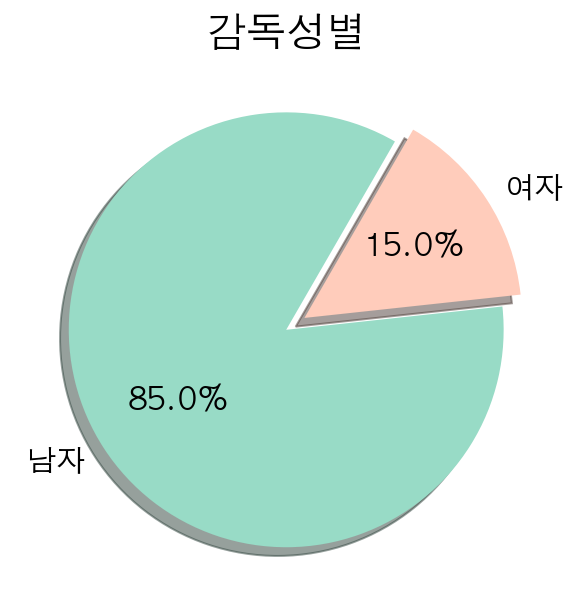

In [70]:
labels=['남자','여자']
director_merge['sex'].value_counts().plot.pie(labels = labels
                    ,colors= ['#98DBC6', '#FFCCBB']
                    ,startangle = 60
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    ,explode = (0,0.1) 
                    ,figsize=(5, 5)
                    ,fontsize = 15)
plt.title('감독성별', fontsize=20)
pylab.ylabel('')

### 박스오피스 붙이기

In [78]:
director_merge.isnull().sum()

movieCd         0
movieNm         0
moviePartNm     0
peopleCd        0
peopleNm        0
sex            11
repRoleNm_x     0
filmoNames      0
repRoleNm_y     0
dtype: int64

In [111]:
boxoffice = pd.read_csv('../01.Data_Collection/boxoffice.csv')

In [81]:
director_merge.sample()

,movieCd,movieNm,moviePartNm,peopleCd,peopleNm,sex,repRoleNm_x,filmoNames,repRoleNm_y
1408,20164424,대장 김창수,배우,20131414,이원태,남자,감독,악인전|대장 김창수|조선마술사|가비|파파|오싹한 연애,감독


In [94]:
boxoffice[boxoffice['영화명']=='스파키']

,순위,영화명,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우
544,76,스파키,2018.4.12,"257,040,200",0.0%,"257,040,200","35,436","35,436",312,"1,949",한국,한국,(주)레드로버,예지림엔터테인먼트,전체관람가,"애니메이션,어드벤처,코미디","아론 우들리,애론 우들리","제시카 비엘,수잔 서랜든"


In [107]:
boxoffice.columns

Index(['순위', '영화명', '개봉일', '매출액 ', '매출액점유율', '누적매출액 ', '관객수 ', '누적관객수 ',
       '스크린수 ', '상영횟수 ', '대표국적 ', '국적 ', '제작사 ', '배급사 ', '등급 ', '장르 ', '감독 ',
       '배우 '],
      dtype='object')

In [110]:
director_merge[director_merge['movieNm']=='파울볼']

,movieCd,movieNm,moviePartNm,peopleCd,peopleNm,sex,repRoleNm_x,filmoNames,repRoleNm_y
232,20157587,파울볼,감독,10066934,조정래,남자,감독,"에움길|소리꾼|귀향, 끝나지 않은 이야기|귀향|파울볼|두레소리",감독
233,20157587,파울볼,감독,20144559,김보경,여자,감독,"파울볼|사랑한다, 사랑하지 않는다|시라노; 연애조작단|멋진 하루|가을로|혈의 누",조감독


In [109]:
boxoffice[boxoffice['감독 ']=='조정래,김보경']

,순위,영화명,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우
30,73,파울볼,2015.4.2,"235,292,500",0.0%,"235,292,500","31,137","31,137",231,"3,859",한국,한국,(주)티피에스컴퍼니,오퍼스픽쳐스(유),전체관람가,다큐멘터리,"조정래,김보경","김성근,조진웅,박지은,박진영,설재훈,이경태,이동현,이상훈,이상훈,이성진,이승엽,이승..."
